### Required Codio Assignment 21.3: End-to-End Classification with Keras

**Expected Time = 60 minutes**

**Total Points = 20**

This activity focuses on using a dataset that contains a mix of feature types to build a binary classification model.  You will use familiar Scikit-Learn preprocessing operations to handle categorical features, and use the transformed data together with a `keras` model.  After building a familiar model, further examples are shown using regularization strategies for neural networks.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### The Data

The dataset contains information gathered from the United States Census about whether or not the individual earned over \$50,000 per year. ([more info here](https://archive.ics.uci.edu/ml/datasets/Adult))

In [2]:
df = pd.read_csv('data/adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
X = df.drop('income', axis = 1)
y = df['income']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

[Back to top](#-Index)

### Problem 1

#### Preparing the Data

**10 Points**

Below, use the `make_column_transformer` function to transform the feature array as `X_train_num` and `X_test_num` using the `OneHotEncoder` with `drop = if_binary`. The remaining existing numeric data should be scaled using `StandardScaler`.  

For the target, assign the values of `y_train_num` and `y_test_num` as a binary array where 1 represents observations earning over \$50,000 per year, and 0 less.  

Note that as long as you have a purely numeric array, the `keras` model will accept this as input.  While you can use a sparse array, here you are to transform the sparse array to a dense array with the `.toarray()` method.

In [7]:
df.select_dtypes('object').columns[:-1] #categorical features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [8]:
y.unique() #unique values of y

array(['<=50K', '>50K'], dtype=object)

In [9]:
y.value_counts(normalize=True) #baseline for model

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

In [10]:
### GRADED
transformer = ''
X_train_num = ''
X_test_num = ''

y_train_num = ''
y_test_num = ''

# YOUR CODE HERE
cat_cols = df.select_dtypes('object').columns[:-1]
num_cols = df.select_dtypes('number').columns

# Create transformer
transformer = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), cat_cols),
    (StandardScaler(), num_cols)
)

# Transform training and test data
X_train_num = transformer.fit_transform(X_train).toarray()
X_test_num = transformer.transform(X_test).toarray()

# Convert target to binary
y_train_num = np.where(y_train == '>50K', 1, 0)
y_test_num = np.where(y_test == '>50K', 1, 0)


### ANSWER CHECK
print(np.unique(y_train_num))
print(type(X_train_num))

[0 1]
<class 'numpy.ndarray'>


[Back to top](#-Index)

### Problem 2

#### Building the model

**10 Points**

Using `keras`, create a `Sequential` model naed `model1` with a linear stack of layers. The first `Dense` layer has 50 units and uses the `relu` activation function. The second `Dense` layer has 1 unit and uses the `sigmoid` activation function, suitable for binary classification.

Next, compile the model with the `bce` loss function and accuracy as the evaluation metric.

Finally, train `model1` for 10 epochs with the training data `X_train_num` and `y_train_num` and validated on test data `X_test_num` and `y_test_num`. Ensure that the training process runs quietly. Assign this result to `history1`


In [13]:
### GRADED
model1 = ''
history1 = ''

# YOUR CODE HERE
model1 = Sequential([
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(
    X_train_num, y_train_num,
    validation_data=(X_test_num, y_test_num),
    epochs=10,
    verbose=0
)

### ANSWER CHECK
print(history1.history['val_accuracy'][-1])

0.8565286993980408


### Exploring Regularization

Below, the questions introduce the notion of regularization in your `keras` models.  The following questions are not graded, but are meant to offer exploratory introduction to using regularization in the neural network.  This may or may not improve our model for income -- but they are important components of some advanced architectures including those coming in the next module.

[Back to top](#-Index)

### Problem 3

#### Regularization in the Network

Similar to what we have seen in early models, there are some options for regularization in your neural network.  Below, `model2` uses `kernel_regularizer = 'l1'` to apply L1 regularization to the hidden layer.  

Explore other options built in to the `Dense` layer for regularization and see if applying either `l1` or `l2` regularization to the kernel and bias elements of the hidden layer.  

Assign your new model as `model2` below, and the fit information as `history2` below.

In [15]:
model2 = Sequential()
model2.add(Dense(50, activation='relu', kernel_regularizer='l2'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(
    X_train_num, y_train_num,
    validation_data=(X_test_num, y_test_num),
    epochs=10,
    verbose=0
)

[Back to top](#-Index)

### Problem 4

#### Dropout

An alternative option for regularization is the `Dropout` layer.  This layer randomly "drops out" nodes in a given layer.  From the `keras` documentation:

```
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
```

To use this, the code below creates a model where 20% of the nodes in the hidden layer will be randomly dropped in each training epoch.  Experiment with this model and incorporate other regularization strategies from above to see if you can improve the performance of predictions on the validation data.

In [16]:
from tensorflow.keras.layers import Dropout

In [17]:
model3 = Sequential()
model3.add(Dense(50, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(
    X_train_num, y_train_num,
    validation_data=(X_test_num, y_test_num),
    epochs=10,
    verbose=0
)

[Back to top](#-Index)

### Problem 5

#### Early Stopping

A third option for regularization is *Early Stopping*.  Here, you can set the model to stop training when overfitting begins.  Overfitting can be defined as the difference between training and validation data during each epoch of training.

To use this in `keras` you use a *callback*.  This is an object that is created and passed as an argument during the fitting of the model.  Below, the code demonstrates the use of the `EarlyStopping` callback from `keras`. Use this to explore alternative settings with both `Dropout` and kernel regularization to see if you can improve the performance of the network.

Plot the training and validation data to explore how early stopping truncated the training when overfitting begins.

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
stopper = EarlyStopping(patience = 4)

In [20]:


stopper = EarlyStopping(patience=4)

model4 = Sequential()
model4.add(Dense(50, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', metrics=['accuracy'])
history4 = model4.fit(
    X_train_num, y_train_num,
    validation_data=(X_test_num, y_test_num),
    epochs=50,  # Set higher since early stopping will control actual epochs
    verbose=0,
    callbacks=[stopper]
)

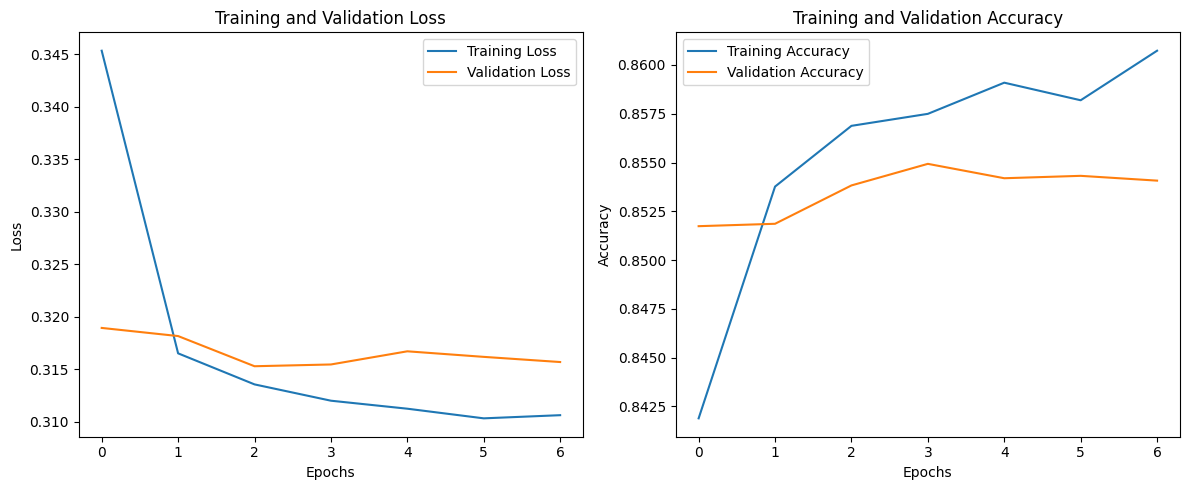

In [21]:
# ... existing code ...

# Plot training and validation metrics
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# ... existing code ...

## Summary of Exercises

This notebook walks through building and improving a binary classification model using Keras, with the following key steps:

1. **Data Preparation**
   - Used `make_column_transformer` to handle mixed feature types
   - Applied `OneHotEncoder` for categorical features and `StandardScaler` for numeric features
   - Converted target variable to binary format

2. **Basic Model Building**
   - Created a simple Sequential model with:
     - One hidden layer (50 units, ReLU activation)
     - Output layer (1 unit, sigmoid activation)
   - Compiled with binary cross-entropy loss and accuracy metric
   - Trained for 10 epochs

3. **Regularization Techniques**
   - Explored L2 regularization in the hidden layer
   - Implemented Dropout (20%) to prevent overfitting
   - Used Early Stopping callback to automatically stop training when validation loss plateaus

4. **Model Evaluation**
   - Visualized training vs validation metrics (loss and accuracy)
   - Compared performance across different regularization approaches

## Key Takeaways

- Keras provides a straightforward API for building neural networks
- Proper data preprocessing is crucial for mixed feature types
- Regularization techniques (L1/L2, Dropout, Early Stopping) help prevent overfitting
- Callbacks like EarlyStopping can optimize training time
- Visualizing training metrics helps diagnose model performance